# Transformada de Fourier

Renato Naville Watanabe

## Preparação do ambiente

In [25]:
try:
  from google.colab import output
  output.enable_custom_widget_manager()
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB: 
  !pip install ipympl

In [24]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

## Motivação



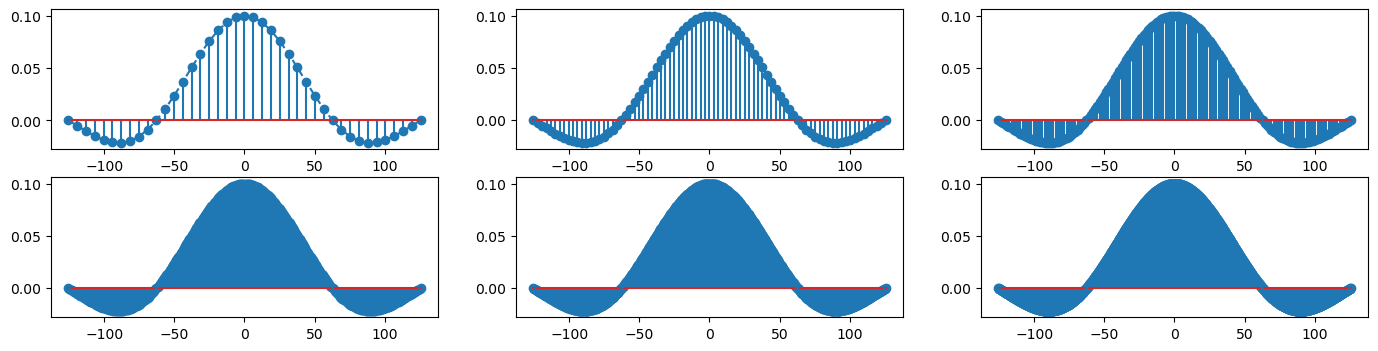

In [23]:


T = [1, 2, 4, 8, 16, 32]

p = dict()
plt.figure(figsize=(17,4))
T1=0.05
for i in range(len(T)):
    plt.subplot(2,3, i+1)
    k = np.arange(-20*2**(i), 20*2**(i)+1)
    omega = 2*np.pi/T[i]*k
    f = 0.1*np.ones(len(omega))
    f[k!=0] = 2*np.sin(omega[k!=0]*T1)/(omega[k!=0])
    
    plt.stem(omega, f)
    plt.plot(omega, f, '--')

plt.show()



## Exercícios

## Referências

- Oppenheim, M.  e Willsky, S., Sistemas e Sinais, 2010
- Ulaby, FT e Yagle, AE, Signals & Systems: Theory and Applications, 2018, [ss2.eecs.umich.edu](ss2.eecs.umich.edu)
- Lathi, BP, Sinais e Sistemas Lineares, 2007
